In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import module for data visualization
from plotnine import *
import plotnine

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot

# Target is only child profiles with child content watches


In [25]:
raw = pd.read_csv('/Users/i.busurkina/Downloads/roc_auc.csv')  

# making preds depending on threshold
for i in range(0, 101):
    raw[f'pred_{i}'] = np.where(raw['share']>=i, 1, 0)
    
raw['target'].value_counts()

0    6240
1    1750
Name: target, dtype: int64

In [32]:
fpr, tpr, thresholds = roc_curve(raw['target'], raw['share']/100)

# рассчитываем ROC AUC
auc_score = roc_auc_score(raw['target'], raw['share']/100)
# рассчитываем roc-кривую
roc_auc = auc(fpr, tpr)

print(auc_score, roc_auc)

0.6760969780219781 0.6760969780219781


Best Threshold: 0.1 with G-Mean: 0.6556
FPR: 0.2984, TPR: 0.6126


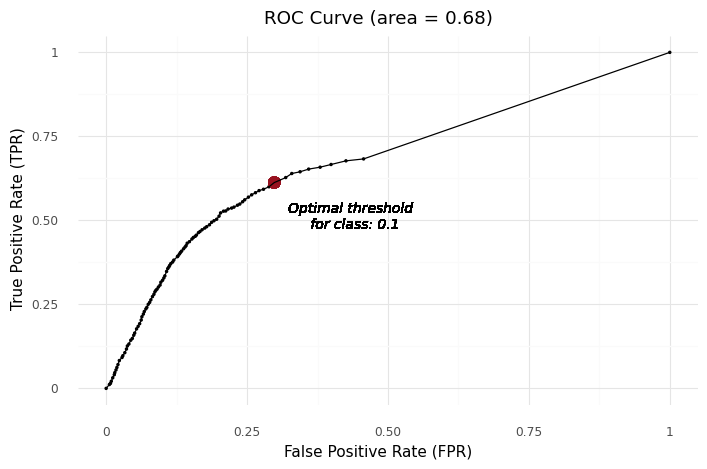

<ggplot: (8787241413675)>

In [33]:
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve (area = %0.2f)' % roc_auc)+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Best Threshold: 0.26 with Youden J statistic: 0.6452
FPR: 0.203, TPR: 0.5223


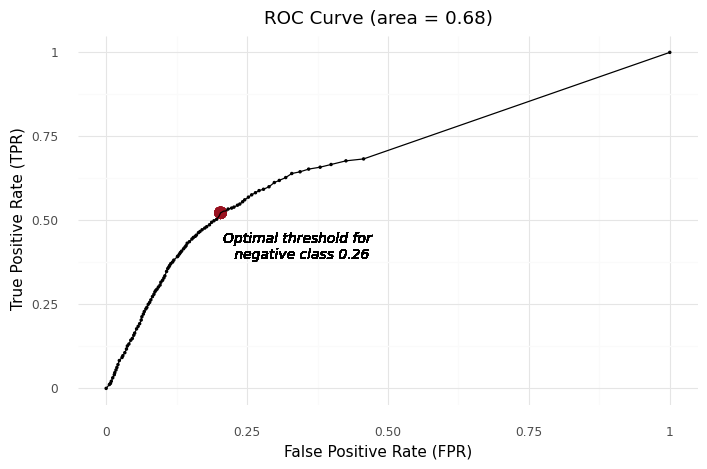

<ggplot: (8787272728444)>

In [34]:
# Calculate the Youden's J statistic
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))



# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    # Annotate the text
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold for \n negative class {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve (area = %0.2f)' % roc_auc)+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Best Threshold: 0.26 with F-Score: 0.465
Recall: 0.5223, Precision: 0.4191


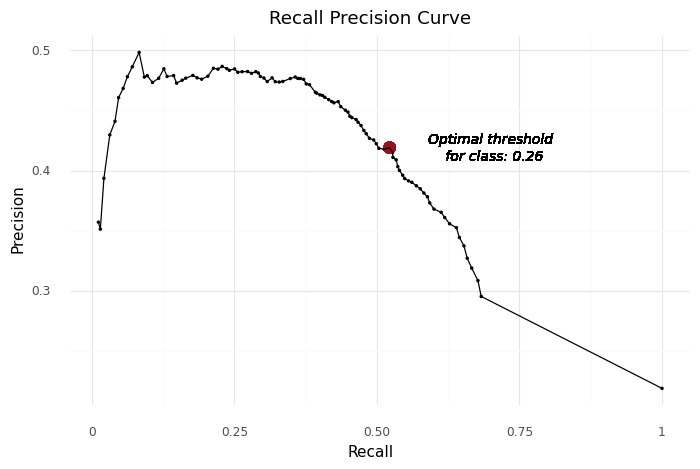

<ggplot: (8787271007579)>

In [35]:
# Create the Precision-Recall curve
precision, recall, thresholds1 = precision_recall_curve(raw['target'], raw['share']/100)

# Plot the ROC curve
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds1})
df_recall_precision.head()

# Calculate the f-score
fscore = (2 * precision * recall) / (precision + recall)

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds1[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = recallOpt,
                   y = precisionOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    # Annotate the text
    geom_text(aes(x = recallOpt,
                  y = precisionOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.18,
              nudge_y = 0,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Recall Precision Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

In [47]:
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'F_score': fscore[::-1], 'Threshold':thresholds})
df_fpr_tpr = df_fpr_tpr.iloc[1:]

df_fpr_tpr.head()

,FPR,TPR,F_score,Threshold
1,0.005769,0.011429,0.022148,1.00
2,0.007692,0.014857,0.028509,0.99
3,0.009135,0.021143,0.040130,0.98
4,0.011699,0.031429,0.058573,0.97
5,0.014423,0.040571,0.074307,0.96


In [50]:
df_recall_precision = df_recall_precision[::-1] 
df_recall_precision.head()

,Precision,Recall,Threshold
100,0.357143,0.011429,1.00
99,0.351351,0.014857,0.99
98,0.393617,0.021143,0.98
97,0.429688,0.031429,0.97
96,0.440994,0.040571,0.96


In [52]:
result = pd.merge(df_fpr_tpr, df_recall_precision, on="Threshold", how="outer")
result

,FPR,TPR,F_score,Threshold,Precision,Recall
0,0.005769,0.011429,0.022148,1.00,0.357143,0.011429
1,0.007692,0.014857,0.028509,0.99,0.351351,0.014857
2,0.009135,0.021143,0.040130,0.98,0.393617,0.021143
3,0.011699,0.031429,0.058573,0.97,0.429688,0.031429
4,0.014423,0.040571,0.074307,0.96,0.440994,0.040571
...,...,...,...,...,...,...
96,0.379647,0.658286,0.437109,0.04,0.327180,0.658286
97,0.399038,0.666286,0.431373,0.03,0.318928,0.666286
98,0.425481,0.677143,0.423971,0.02,0.308594,0.677143
99,0.456731,0.682857,0.412425,0.01,0.295426,0.682857


In [54]:
result.to_csv('result_metrics_child.csv')

# Target is child profiles with child content watches + adult profiles with child content watches >= mean elements in children's genre



In [104]:
# десткие просмотры на периоде в детских профилях и детские просмотры во взрослых профилях >= 25 (среднее по просмотрам детского контента на периоде)
raw1 = pd.read_csv('/Users/i.busurkina/Downloads/roc_auc1.csv')  

# making preds depending on threshold
for i in range(0, 101):
    raw1[f'pred_{i}'] = np.where(raw1['share']>=i, 1, 0)

raw1['target'].value_counts()

0    5528
1    2462
Name: target, dtype: int64

In [110]:
1533*100/7990

19.18648310387985

In [105]:
raw1[(raw1['target']==1) & (raw1['pred_10']==1)][['target','pred_10']]


,target,pred_10
1,1,1
2,1,1
3,1,1
5,1,1
13,1,1
...,...,...
7933,1,1
7938,1,1
7958,1,1
7963,1,1


In [96]:
fpr, tpr, thresholds = roc_curve(raw1['target'], raw1['share']/100)

# рассчитываем ROC AUC
auc_score = roc_auc_score(raw1['target'], raw1['share']/100)
# рассчитываем roc-кривую
roc_auc = auc(fpr, tpr)

print(auc_score, roc_auc)

0.7084563072155519 0.7084563072155519


Best Threshold: 0.09 with G-Mean: 0.6827
FPR: 0.2616, TPR: 0.6312


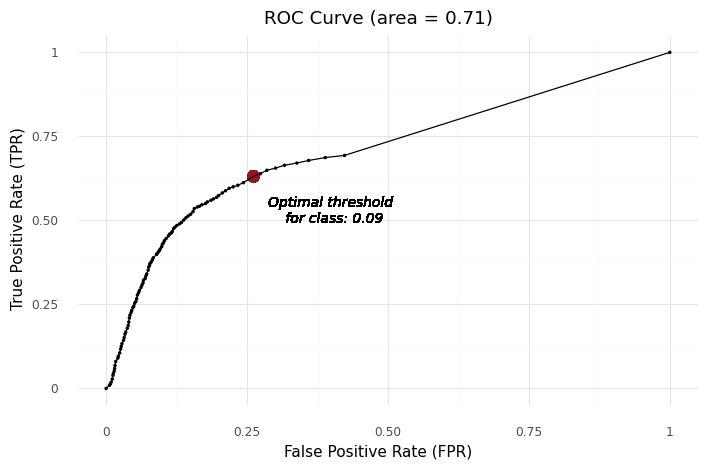

<ggplot: (8787243137452)>

In [97]:
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve (area = %0.2f)' % roc_auc)+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Best Threshold: 0.26 with Youden J statistic: 0.6718
FPR: 0.1563, TPR: 0.5349


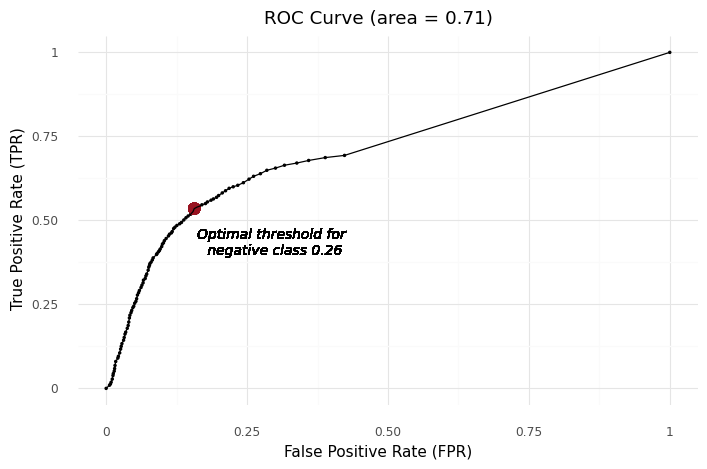

<ggplot: (8787273646496)>

In [98]:
# Calculate the Youden's J statistic
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))



# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    # Annotate the text
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold for \n negative class {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve (area = %0.2f)' % roc_auc)+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Best Threshold: 0.14 with F-Score: 0.5711
Recall: 0.5955, Precision: 0.5487


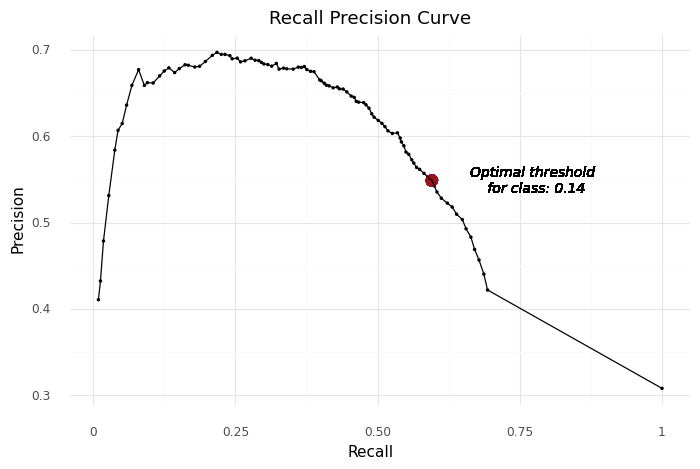

<ggplot: (8787272639504)>

In [99]:
# Create the Precision-Recall curve
precision, recall, thresholds1 = precision_recall_curve(raw1['target'], raw1['share']/100)

# Plot the ROC curve
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds1})
df_recall_precision.head()

# Calculate the f-score
fscore = (2 * precision * recall) / (precision + recall)

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds1[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = recallOpt,
                   y = precisionOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    # Annotate the text
    geom_text(aes(x = recallOpt,
                  y = precisionOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.18,
              nudge_y = 0,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Recall Precision Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

In [100]:
fscore = fscore[::-1][1:]

In [101]:
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'F_score': fscore, 'Threshold':thresholds})
df_fpr_tpr = df_fpr_tpr.iloc[1:]

df_recall_precision = df_recall_precision[::-1] 

result = pd.merge(df_fpr_tpr, df_recall_precision, on="Threshold", how="outer")
result

,FPR,TPR,F_score,Threshold,Precision,Recall
0,0.005970,0.009342,0.025237,1.00,0.410714,0.009342
1,0.007598,0.012998,0.035211,0.99,0.432432,0.012998
2,0.008864,0.018278,0.052510,0.98,0.478723,0.018278
3,0.010854,0.027620,0.071674,0.97,0.531250,0.027620
4,0.012120,0.038180,0.081818,0.96,0.583851,0.038180
...,...,...,...,...,...,...
96,0.359262,0.678310,0.545930,0.03,0.456783,0.678310
97,0.388748,0.686840,0.536655,0.02,0.440365,0.686840
98,0.422938,0.693339,0.524666,0.01,0.422002,0.693339
99,1.000000,1.000000,0.471106,0.00,0.308135,1.000000


In [102]:
result.to_csv('result_metrics_child_adult.csv')

# Target is child profiles with child content watches + adult profiles with child content watches >= median elements in children's genre


In [111]:
# десткие просмотры на периоде в детских профилях и детские просмотры во взрослых профилях >= 7 (медиана по просмотрам детского контента на периоде)
raw2 = pd.read_csv('/Users/i.busurkina/Downloads/roc_auc2.csv')  

# making preds depending on threshold
for i in range(0, 101):
    raw2[f'pred_{i}'] = np.where(raw2['share']>=i, 1, 0)

raw2['target'].value_counts()

0    4592
1    3398
Name: target, dtype: int64

In [116]:
raw2[(raw2['target']==1) & (raw2['pred_7']==1)][['target','pred_7']]


,target,pred_7
0,1,1
2,1,1
15,1,1
28,1,1
34,1,1
...,...,...
7968,1,1
7975,1,1
7979,1,1
7983,1,1


In [118]:
2083*100/7990

26.07008760951189

In [82]:
fpr, tpr, thresholds = roc_curve(raw2['target'], raw2['share']/100)

# рассчитываем ROC AUC
auc_score = roc_auc_score(raw2['target'], raw2['share']/100)
# рассчитываем roc-кривую
roc_auc = auc(fpr, tpr)

print(auc_score, roc_auc)

0.71102797582304 0.71102797582304


Best Threshold: 0.07 with G-Mean: 0.6836
FPR: 0.2376, TPR: 0.613


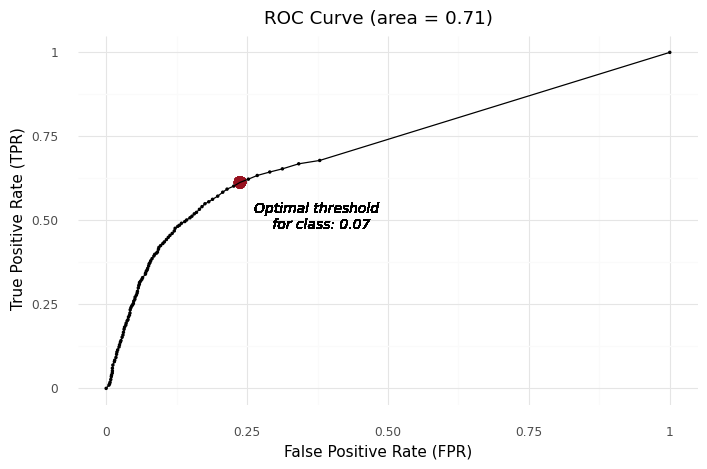

<ggplot: (8787274272747)>

In [83]:
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve (area = %0.2f)' % roc_auc)+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Best Threshold: 0.09 with Youden J statistic: 0.6825
FPR: 0.2145, TPR: 0.593


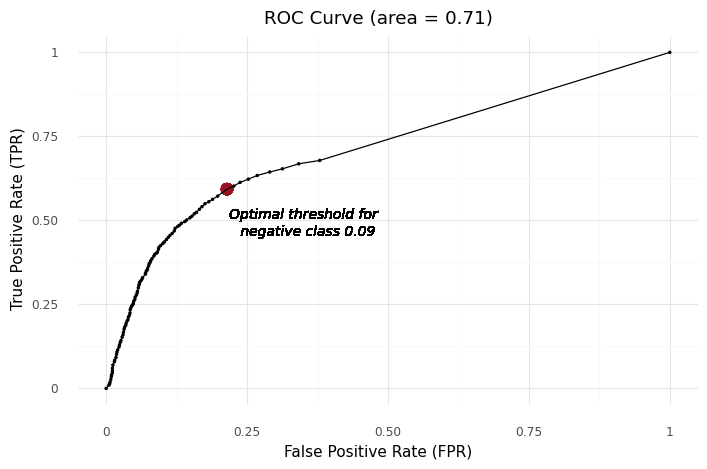

<ggplot: (8787273643761)>

In [84]:
# Calculate the Youden's J statistic
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))



# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    # Annotate the text
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold for \n negative class {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve (area = %0.2f)' % roc_auc)+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Best Threshold: 0.05 with F-Score: 0.6349
Recall: 0.6336, Precision: 0.6362


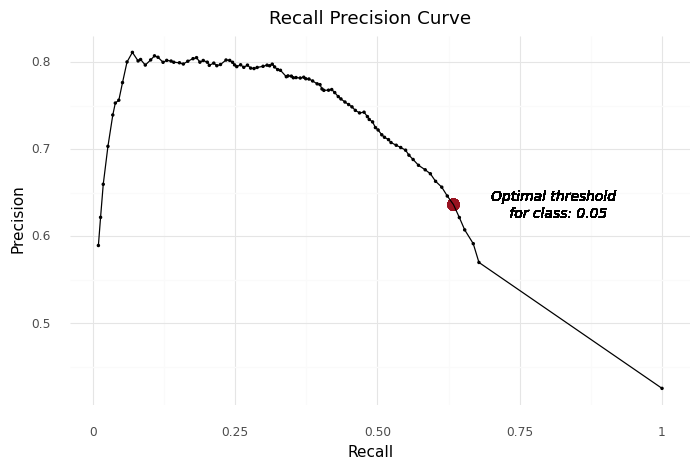

<ggplot: (8787242461489)>

In [85]:
# Create the Precision-Recall curve
precision, recall, thresholds1 = precision_recall_curve(raw2['target'], raw2['share']/100)

# Plot the ROC curve
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds1})
df_recall_precision.head()

# Calculate the f-score
fscore = (2 * precision * recall) / (precision + recall)

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds1[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = recallOpt,
                   y = precisionOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    # Annotate the text
    geom_text(aes(x = recallOpt,
                  y = precisionOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.18,
              nudge_y = 0,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Recall Precision Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

In [86]:
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'F_score': fscore[::-1], 'Threshold':thresholds})
df_fpr_tpr = df_fpr_tpr.iloc[1:]
df_recall_precision = df_recall_precision[::-1] 

result = pd.merge(df_fpr_tpr, df_recall_precision, on="Threshold", how="outer")
result

,FPR,TPR,F_score,Threshold,Precision,Recall
0,0.005009,0.009712,0.019108,1.00,0.589286,0.009712
1,0.006098,0.013537,0.026498,0.99,0.621622,0.013537
2,0.006969,0.018246,0.035510,0.98,0.659574,0.018246
3,0.008275,0.026486,0.051049,0.97,0.703125,0.026486
4,0.009146,0.035021,0.066873,0.96,0.739130,0.035021
...,...,...,...,...,...,...
96,0.290287,0.643908,0.632461,0.04,0.621414,0.643908
97,0.312718,0.653325,0.629430,0.03,0.607221,0.653325
98,0.341681,0.668334,0.627521,0.02,0.591406,0.668334
99,0.378920,0.678340,0.619374,0.01,0.569839,0.678340


In [87]:
result.to_csv('result_metrics_child_adult_big.csv')